In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
!pip install --upgrade pandas==1.2.4


In [3]:
print(pd.__version__)

1.2.4


In [4]:
df = pd.read_csv('Smartphone_price_dataset.csv')

In [5]:
df.head(10)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,Apple iPhone 14,"₹65,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,Xiaomi Redmi Note 12 Pro Plus,"₹29,999",86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,Nothing Phone 1,"₹26,749",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,OnePlus Nord 2T 5G,"₹28,999",84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [7]:
df.shape

(1020, 11)

In [8]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(columns=['rating'],axis=1)

# Data Cleaning

In [11]:
# Model column

df['Brand'] = df['model'].apply(lambda x: x.split(" ",1)[0])

In [12]:
def brand_extraction(text):
    if (text=="Xiaomi" or text=="Samsung" or text=="Vivo" or text=="Realme" or text=="OPPO" or text=="Motorola" or text=="Apple" or text=="OnePlus" or text=="Tecno" or text=="iQOO" or text=="Nokia" or text=="Infinix" or text=="Poco" or text=="Oppo" or text=="Huawei" or text=="Google" or text=="Google" or text=="Honor" or text=="POCO" or text=="itel" or text=="Sony" or text=="Asus"):
        return text
    else:
        return "Other brands"

In [13]:
df['Brand'] = df['Brand'].apply(brand_extraction)

In [14]:
df['Brand'].value_counts()

Samsung         135
Xiaomi          135
Vivo            111
Realme           97
Other brands     77
OPPO             62
Motorola         53
Apple            47
OnePlus          42
Tecno            33
iQOO             32
Nokia            30
Infinix          29
Poco             28
Oppo             26
Huawei           16
Google           14
Honor            13
POCO             13
itel             11
Sony              9
Asus              7
Name: Brand, dtype: int64

In [15]:
df = df.drop('model',axis=1)

In [16]:
df.drop(columns=['sim','card'],axis=1,inplace=True)

In [17]:
# Price column

df['price'] = df['price'].str.replace('₹','')

In [18]:
df['Price(In Rupees)'] = df['price'].str.replace(',','').astype('int')

In [19]:
df.drop('price',axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   processor         1020 non-null   object
 1   ram               1020 non-null   object
 2   battery           1020 non-null   object
 3   display           1020 non-null   object
 4   camera            1019 non-null   object
 5   os                1003 non-null   object
 6   Brand             1020 non-null   object
 7   Price(In Rupees)  1020 non-null   int32 
dtypes: int32(1), object(7)
memory usage: 59.9+ KB


In [21]:
df.head(10)

,processor,ram,battery,display,camera,os,Brand,Price(In Rupees)
0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999
1,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989
2,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499
3,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999
4,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999
5,"Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,Android v12,Samsung,16999
6,"Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,iOS v16,Apple,65999
7,"Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v12,Xiaomi,29999
8,"Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,No FM Radio,Other brands,26749
9,"Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,No FM Radio,OnePlus,28999


In [22]:
# Processor column

df['processor'].nunique()

298

In [23]:
df['Processor'] = df['processor'].apply(lambda x: re.sub(r'\s+', ' ', x.split(',', 1)[0]).strip())

In [24]:
df.drop('processor',axis=1,inplace=True)

In [25]:
df.head()

,ram,battery,display,camera,os,Brand,Price(In Rupees),Processor
0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2
1,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695
2,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos 1330
3,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695
4,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Dimensity 1080


In [26]:
df['Processor'].value_counts().head(20)

Snapdragon 695        53
Snapdragon 680        43
Snapdragon 8+ Gen1    39
Snapdragon 8 Gen1     36
Dimensity 700 5G      32
Helio P35             31
Dimensity 810 5G      27
Snapdragon 8 Gen2     26
Snapdragon 888        23
Snapdragon 870        23
Snapdragon 778G       21
Helio G96             21
Helio G35             20
Helio G85             18
Bionic A15            18
Helio G99             17
Helio G80             14
Helio G25             13
Dimensity 920 5G      13
Snapdragon 865        13
Name: Processor, dtype: int64

In [27]:
def fetch_processor(text):
    if text=="Snapdragon 695" or text=="Snapdragon 680" or text=="Snapdragon 8+ Gen1" or text=="Snapdragon 8 Gen1" or text=="Dimensity 700 5G" or text=="Helio P35" or text=="Dimensity 810 5G" or text=="Snapdragon 8 Gen2" or text=="Snapdragon 888"or text=="Snapdragon 870" or text=="Helio G96" or text=="Snapdragon 778G" or text=="Helio G35" or text=="Helio G85" or text=="Bionic A15"or text=="Helio G99":
        return text
    else:
        if text.split()[0]=="Snapdragon":
            return "Other Snapdragon Processors"
        elif text.split()[0]=="Helio":
            return "Other Helio Processors"
        elif text.split()[0]=="Exynos":
            return "Exynos processors"
        elif text.split()[0]=="Dimensity":
            return "Other Dimensity Processors"
        elif text.split()[0]=="Bionic":
            return "Other Bionic Processors"
        else:
            return "Other Processors"
    

In [28]:
df['Processor'] = df['Processor'].apply(fetch_processor)

In [29]:
df['Processor'].value_counts()

Other Snapdragon Processors    147
Other Processors               142
Other Dimensity Processors     118
Other Helio Processors          95
Snapdragon 695                  53
Exynos processors               49
Snapdragon 680                  43
Snapdragon 8+ Gen1              39
Snapdragon 8 Gen1               36
Dimensity 700 5G                32
Helio P35                       31
Dimensity 810 5G                27
Snapdragon 8 Gen2               26
Snapdragon 888                  23
Snapdragon 870                  23
Other Bionic Processors         21
Snapdragon 778G                 21
Helio G96                       21
Helio G35                       20
Bionic A15                      18
Helio G85                       18
Helio G99                       17
Name: Processor, dtype: int64

In [30]:
df.head()

,ram,battery,display,camera,os,Brand,Price(In Rupees),Processor
0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2
1,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695
2,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors
3,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695
4,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors


In [31]:
# RAM column

df['phone_ram'] = df['ram'].apply(lambda x:x.split(",",1)[0])

In [32]:
def extract_ram_size(text):
    match = re.search(r'(\d+)\s*GB', text)
    if match:
        return int(match.group(1))
    else:
        return None

In [33]:
df['RAM(GB)'] = df['phone_ram'].apply(extract_ram_size)

In [34]:
df['RAM(GB)'] = df['RAM(GB)'].astype('Int64')

In [35]:
df.drop('phone_ram',axis=1,inplace=True)

In [36]:
df.head()

,ram,battery,display,camera,os,Brand,Price(In Rupees),Processor,RAM(GB)
0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2,12
1,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695,6
2,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors,4
3,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695,6
4,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors,6


In [37]:
#ROM

def extract_inbuilt_size(text):
    match = re.search(r'(\d+)\s*GB\s*inbuilt', text)
    if match:
        return int(match.group(1))
    else:
        return None

In [38]:
df['ROM(GB)'] = df['ram'].apply(extract_inbuilt_size)

In [39]:
df['ROM(GB)'] = df['ROM(GB)'].astype('Int64')

In [40]:
df.head()

,ram,battery,display,camera,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB)
0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2,12,256
1,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695,6,128
2,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors,4,64
3,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695,6,128
4,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors,6,128


In [41]:
df.drop('ram',axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   battery           1020 non-null   object
 1   display           1020 non-null   object
 2   camera            1019 non-null   object
 3   os                1003 non-null   object
 4   Brand             1020 non-null   object
 5   Price(In Rupees)  1020 non-null   int32 
 6   Processor         1020 non-null   object
 7   RAM(GB)           982 non-null    Int64 
 8   ROM(GB)           979 non-null    Int64 
dtypes: Int64(2), int32(1), object(6)
memory usage: 69.9+ KB


In [43]:
df.head()

,battery,display,camera,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB)
0,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2,12,256
1,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695,6,128
2,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors,4,64
3,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695,6,128
4,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors,6,128


In [44]:
# Battery column

In [45]:
df['battery'].value_counts()

5000 mAh Battery with 33W Fast Charging    103
5000 mAh Battery with 18W Fast Charging     89
5000 mAh Battery                            74
5000 mAh Battery with 67W Fast Charging     30
5000 mAh Battery with 10W Fast Charging     28
                                          ... 
2230 mAh Battery                             1
4.7 inches, 750 x 1334 px Display            1
2438 mAh Battery with Fast Charging          1
8 MP Rear & 1.2 MP Front Camera              1
3400 mAh Battery with Fast Charging          1
Name: battery, Length: 256, dtype: int64

In [46]:
def extract_battery_capacity(text):
    match = re.search(r'(\d+)\s*mAh', text)
    if match:
        return int(match.group(1))
    else:
        return None

In [47]:
df['Battery(mAh)'] = df['battery'].apply(extract_battery_capacity)

In [48]:
df['Battery(mAh)'] = df['Battery(mAh)'].astype('Int64')

In [49]:
df.drop('battery',axis=1,inplace=True)

In [50]:
df.head(20)

,display,camera,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB),Battery(mAh)
0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2,12,256,5000
1,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695,6,128,5000
2,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors,4,64,5000
3,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695,6,128,5000
4,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors,6,128,5000
5,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,Android v12,Samsung,16999,Other Snapdragon Processors,6,128,5000
6,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,iOS v16,Apple,65999,Bionic A15,6,128,3279
7,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v12,Xiaomi,29999,Other Dimensity Processors,8,256,4980
8,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,No FM Radio,Other brands,26749,Other Snapdragon Processors,8,128,4500
9,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,No FM Radio,OnePlus,28999,Other Dimensity Processors,8,128,4500


In [51]:
df['camera'].isnull().sum()

1

In [52]:
# Drop the row with missing value in the 'camera' column
df.dropna(subset=['camera'], inplace=True)


In [53]:
df['Primary_Rear_Camera(MP)'] = df['camera'].str.extract(r'(\d+)\s*MP(?=\s*[+])').astype(float)
df['Secondary_Rear_Camera1(MP)'] = df['camera'].str.extract(r'(\d+)\s*MP(?=\s*[+])', expand=False).astype(float)
df['Secondary_Rear_Camera2(MP)'] = df['camera'].str.extract(r'(?<=\+)\s*(\d+)\s*MP(?=\s*[+])', expand=False).astype(float)
df['Front_Camera(MP)'] = df['camera'].str.extract(r'(\d+)\s*MP(?=\s*Front)', expand=False).astype(float)

In [54]:
df['Primary_Rear_Camera(MP)'].fillna(0, inplace=True)
df['Secondary_Rear_Camera1(MP)'].fillna(0, inplace=True)
df['Secondary_Rear_Camera2(MP)'].fillna(0, inplace=True)
df['Front_Camera(MP)'].fillna(0, inplace=True)

In [55]:
df['Primary_Rear_Camera(MP)'] = df['Primary_Rear_Camera(MP)'].astype(int)
df['Secondary_Rear_Camera1(MP)'] = df['Secondary_Rear_Camera1(MP)'].astype(int)
df['Secondary_Rear_Camera2(MP)'] = df['Secondary_Rear_Camera2(MP)'].astype(int)
df['Front_Camera(MP)'] = df['Front_Camera(MP)'].astype(int)

In [56]:
df.head()

,display,camera,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB),Battery(mAh),Primary_Rear_Camera(MP),Secondary_Rear_Camera1(MP),Secondary_Rear_Camera2(MP),Front_Camera(MP)
0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,OnePlus,54999,Snapdragon 8 Gen2,12,256,5000,50,50,48,16
1,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,OnePlus,19989,Snapdragon 695,6,128,5000,64,64,2,16
2,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,Samsung,16499,Exynos processors,4,64,5000,50,50,2,13
3,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Motorola,14999,Snapdragon 695,6,128,5000,50,50,8,16
4,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,Realme,24999,Other Dimensity Processors,6,128,5000,108,108,8,16


In [57]:
df.drop('camera',axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   display                     1019 non-null   object
 1   os                          1003 non-null   object
 2   Brand                       1019 non-null   object
 3   Price(In Rupees)            1019 non-null   int32 
 4   Processor                   1019 non-null   object
 5   RAM(GB)                     982 non-null    Int64 
 6   ROM(GB)                     979 non-null    Int64 
 7   Battery(mAh)                987 non-null    Int64 
 8   Primary_Rear_Camera(MP)     1019 non-null   int32 
 9   Secondary_Rear_Camera1(MP)  1019 non-null   int32 
 10  Secondary_Rear_Camera2(MP)  1019 non-null   int32 
 11  Front_Camera(MP)            1019 non-null   int32 
dtypes: Int64(3), int32(5), object(4)
memory usage: 86.6+ KB


In [59]:
df.corr()['Price(In Rupees)']

Price(In Rupees)              1.000000
RAM(GB)                       0.228594
ROM(GB)                       0.526646
Battery(mAh)                 -0.102576
Primary_Rear_Camera(MP)       0.010761
Secondary_Rear_Camera1(MP)    0.010761
Secondary_Rear_Camera2(MP)    0.224182
Front_Camera(MP)              0.071232
Name: Price(In Rupees), dtype: float64

In [60]:
# Display column

# df['Display_size(inches)'] = df['display'].str.extract(r'(\d+\.\d+) inches', expand=False).astype(float)

def extract_display_size(text):
    match = re.search(r'(\d+\.\d+)\sinches', text)
    if match:
        return float(match.group(1))
    else:
        return None

In [61]:
df['Display(inches)'] = df['display'].apply(extract_display_size)

In [62]:
df['Display(inches)'] = df['Display(inches)'].astype('float64')

In [63]:
df.head()

,display,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB),Battery(mAh),Primary_Rear_Camera(MP),Secondary_Rear_Camera1(MP),Secondary_Rear_Camera2(MP),Front_Camera(MP),Display(inches)
0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",Android v13,OnePlus,54999,Snapdragon 8 Gen2,12,256,5000,50,50,48,16,6.70
1,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",Android v12,OnePlus,19989,Snapdragon 695,6,128,5000,64,64,2,16,6.59
2,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",Android v13,Samsung,16499,Exynos processors,4,64,5000,50,50,2,13,6.60
3,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",Android v12,Motorola,14999,Snapdragon 695,6,128,5000,50,50,8,16,6.55
4,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",Android v13,Realme,24999,Other Dimensity Processors,6,128,5000,108,108,8,16,6.70


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   display                     1019 non-null   object 
 1   os                          1003 non-null   object 
 2   Brand                       1019 non-null   object 
 3   Price(In Rupees)            1019 non-null   int32  
 4   Processor                   1019 non-null   object 
 5   RAM(GB)                     982 non-null    Int64  
 6   ROM(GB)                     979 non-null    Int64  
 7   Battery(mAh)                987 non-null    Int64  
 8   Primary_Rear_Camera(MP)     1019 non-null   int32  
 9   Secondary_Rear_Camera1(MP)  1019 non-null   int32  
 10  Secondary_Rear_Camera2(MP)  1019 non-null   int32  
 11  Front_Camera(MP)            1019 non-null   int32  
 12  Display(inches)             967 non-null    float64
dtypes: Int64(3), float64(1), int32(5)

In [65]:
# Fill missing display size values with the mode
most_frequent_display_size = df['Display(inches)'].mode()[0]
df['Display(inches)'].fillna(most_frequent_display_size, inplace=True)


In [66]:
def calculate_ppi(display_resolution, display_size):
    # Extract width and height values from display resolution
    match = re.search(r'(\d+)\s*x\s*(\d+)\s*px', display_resolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    else:
        return None

    # Extract the numerical value from the display size
    match = re.search(r'(\d+\.?\d*)\s*inches?', display_size)
    if match:
        diagonal_size = float(match.group(1))
    else:
        return None

    # Calculate PPI
    ppi = ((width ** 2) + (height ** 2)) ** 0.5 / diagonal_size

    return ppi

# Apply the custom function to the 'display' column
df['PPI'] = df.apply(lambda row: calculate_ppi(row['display'], row['display']), axis=1)

In [67]:
df.drop('display',axis=1,inplace=True)

In [68]:
# os column

df['os'].value_counts()

Android v12                           287
Android v11                           233
No FM Radio                           192
Android v10                            58
Android v13                            45
Bluetooth                              38
Android v9.0 (Pie)                     27
Android v10.0                          22
iOS v16                                14
Android v8.1 (Oreo)                    10
iOS v15                                10
Memory Card Not Supported               6
Browser                                 4
Android v11.0                           4
Android v8.0 (Oreo)                     4
Memory Card Supported, upto 32 GB       3
iOS v13                                 3
iOS v15.0                               3
Android v6.0 (Marshmallow)              3
Memory Card (Hybrid), upto 256 GB       2
RTOS (Series 30+)                       2
Memory Card Supported, upto 256 GB      2
EMUI v12                                2
Android v5.1.1 (Lollipop)         

In [69]:
most_frequent_os = df['os'].mode()[0]
df['os'].fillna(most_frequent_os, inplace=True)

In [70]:
import pandas as pd
import re




# Function to standardize OS versions
def standardize_os_version(version):
    match = re.search(r'(\d+)\.?(\d*)', version)
    if match:
        major_version = int(match.group(1))
        minor_version = int(match.group(2)) if match.group(2) else 0
        if minor_version == 0:
            return f'{version.split("v")[0]}v{major_version}'
        else:
            return f'{version.split("v")[0]}v{major_version}.{minor_version}'
    else:
        return version

# Apply the function to the 'os' column and create a new column 'os_standardized'
df['os_standardized'] = df['os'].apply(standardize_os_version)

# Count the occurrences of each standardized OS version
counted_versions = df['os_standardized'].value_counts()

print(counted_versions)


Android v12                               303
Android v11                               237
No FM Radio                               192
Android v10                                80
Android v13                                45
Bluetooth                                  38
Android v9                                 28
iOS v16                                    14
iOS v15                                    13
Android v8.1                               10
Memory Card Not Supported                   6
Browser                                     4
iOS v13                                     4
Android v8                                  4
Memory Card Supported, upto 32 GBv32        3
Android v5.1                                3
Android v6                                  3
EMUI v12                                    2
RTOS (Series 30+)v30                        2
Memory Card Supported, upto 256 GBv256      2
Memory Card Supported, upto 64 GBv64        2
Memory Card (Hybrid), upto 256 GBv

In [71]:
def extract_os_versions(text):
    if text=="Android v12" or text=="Android v11" or text=="Android v10" or text=="Android v13" or text=="Android v9" or text=="Android v16" or text=="Android v15" or text=="Android 8.1":
        return text
    elif text=="iOS v16" or text=="iOS v15":
        return text
    else:
        if text.split()[0] == 'Android':
            return "Other Android OS"
        elif text.split()[0] == 'iOS':
            return "Other iOS"
        else:
            return "Other OS versions"


In [72]:
df['OS'] = df['os_standardized'].apply(extract_os_versions)

In [73]:
df.sample(5)

,os,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB),Battery(mAh),Primary_Rear_Camera(MP),Secondary_Rear_Camera1(MP),Secondary_Rear_Camera2(MP),Front_Camera(MP),Display(inches),PPI,os_standardized,OS
628,No FM Radio,Apple,139900,Other Bionic Processors,6,512,<NA>,0,0,0,0,6.50,NaN,No FM Radio,Other OS versions
675,Android v11,Xiaomi,16999,Other Dimensity Processors,6,128,5000,64,64,8,16,6.60,398.758404,Android v11,Android v11
526,Bluetooth,Realme,49959,Snapdragon 8 Gen1,8,128,5000,50,50,50,32,6.70,525.921017,Bluetooth,Other OS versions
112,Bluetooth,Xiaomi,22999,Other Dimensity Processors,6,128,5080,64,64,8,16,6.60,407.065694,Bluetooth,Other OS versions
843,No FM Radio,Xiaomi,42990,Snapdragon 8 Gen1,8,128,4500,50,50,13,32,6.28,419.077303,No FM Radio,Other OS versions


In [74]:
df['OS'].value_counts()

Android v12          303
Other OS versions    269
Android v11          237
Android v10           80
Android v13           45
Android v9            28
Other Android OS      24
iOS v16               14
iOS v15               13
Other iOS              6
Name: OS, dtype: int64

In [75]:
df.drop(columns=['os','os_standardized'],axis=1,inplace=True)

In [76]:
df

,Brand,Price(In Rupees),Processor,RAM(GB),ROM(GB),Battery(mAh),Primary_Rear_Camera(MP),Secondary_Rear_Camera1(MP),Secondary_Rear_Camera2(MP),Front_Camera(MP),Display(inches),PPI,OS
0,OnePlus,54999,Snapdragon 8 Gen2,12,256,5000,50,50,48,16,6.70,525.921017,Android v13
1,OnePlus,19989,Snapdragon 695,6,128,5000,64,64,2,16,6.59,401.024751,Android v12
2,Samsung,16499,Exynos processors,4,64,5000,50,50,2,13,6.60,399.864072,Android v13
3,Motorola,14999,Snapdragon 695,6,128,5000,50,50,8,16,6.55,401.802361,Android v12
4,Realme,24999,Other Dimensity Processors,6,128,5000,108,108,8,16,6.70,394.440763,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola,34990,Snapdragon 8 Gen1,8,128,5000,64,64,8,16,6.67,402.793640,Other OS versions
1016,Honor,14990,Other Snapdragon Processors,6,128,5000,48,48,2,8,6.50,269.928766,Android v11
1017,POCO,28990,Other Dimensity Processors,8,256,5080,64,64,8,16,6.60,407.065694,Android v12
1018,Motorola,19990,Snapdragon 695,6,128,5000,108,108,8,32,6.80,387.030215,Android v12


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       1019 non-null   object 
 1   Price(In Rupees)            1019 non-null   int32  
 2   Processor                   1019 non-null   object 
 3   RAM(GB)                     982 non-null    Int64  
 4   ROM(GB)                     979 non-null    Int64  
 5   Battery(mAh)                987 non-null    Int64  
 6   Primary_Rear_Camera(MP)     1019 non-null   int32  
 7   Secondary_Rear_Camera1(MP)  1019 non-null   int32  
 8   Secondary_Rear_Camera2(MP)  1019 non-null   int32  
 9   Front_Camera(MP)            1019 non-null   int32  
 10  Display(inches)             1019 non-null   float64
 11  PPI                         987 non-null    float64
 12  OS                          1019 non-null   object 
dtypes: Int64(3), float64(2), int32(5)

In [78]:
df.isnull().sum()

Brand                          0
Price(In Rupees)               0
Processor                      0
RAM(GB)                       37
ROM(GB)                       40
Battery(mAh)                  32
Primary_Rear_Camera(MP)        0
Secondary_Rear_Camera1(MP)     0
Secondary_Rear_Camera2(MP)     0
Front_Camera(MP)               0
Display(inches)                0
PPI                           32
OS                             0
dtype: int64

In [79]:
most_frequent_RAM = df['RAM(GB)'].mode()[0]
df['RAM(GB)'].fillna(most_frequent_RAM, inplace=True)

In [80]:
most_frequent_ROM = df['ROM(GB)'].mode()[0]
df['ROM(GB)'].fillna(most_frequent_RAM, inplace=True)

In [81]:
most_frequent_battery = df['Battery(mAh)'].mode()[0]
df['Battery(mAh)'].fillna(most_frequent_battery, inplace=True)

In [82]:
df['PPI']= df['PPI'].fillna(df['PPI'].mean())

In [83]:
df.isnull().sum()

Brand                         0
Price(In Rupees)              0
Processor                     0
RAM(GB)                       0
ROM(GB)                       0
Battery(mAh)                  0
Primary_Rear_Camera(MP)       0
Secondary_Rear_Camera1(MP)    0
Secondary_Rear_Camera2(MP)    0
Front_Camera(MP)              0
Display(inches)               0
PPI                           0
OS                            0
dtype: int64

In [84]:

rows_to_delete = [483, 439, 762]

# Drop the specified rows using the 'rows_to_delete' list
df.drop(rows_to_delete, inplace=True)


# Visulaization

C:\FAIZUL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price(In Rupees)', ylabel='Density'>

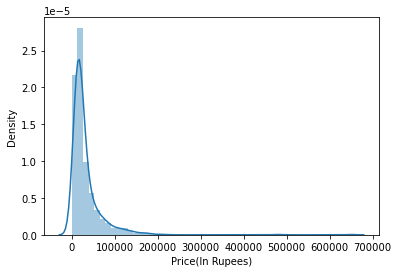

In [85]:
sns.distplot(df['Price(In Rupees)'])

<AxesSubplot:>

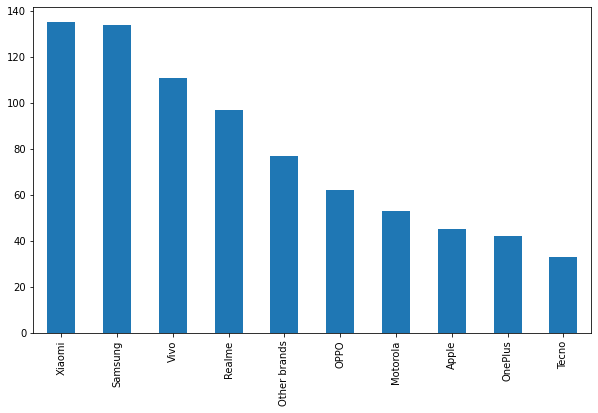

In [86]:
plt.figure(figsize=(10, 6)) 
df['Brand'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

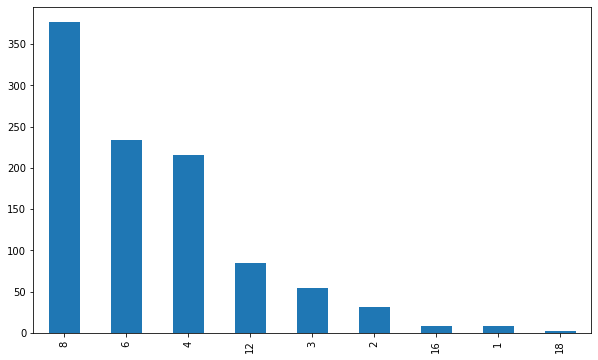

In [87]:
plt.figure(figsize=(10,6))
df['RAM(GB)'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

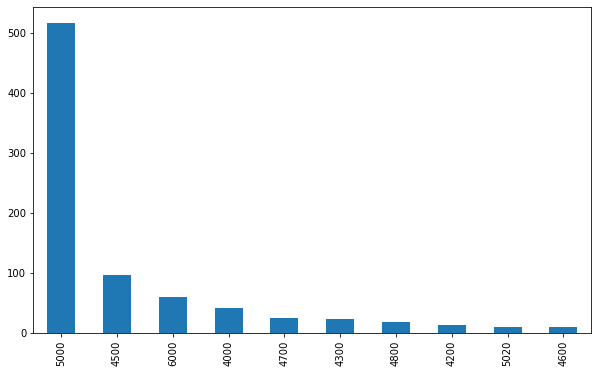

In [88]:
plt.figure(figsize=(10,6))
df['Battery(mAh)'].value_counts().head(10).plot(kind='bar')

In [89]:
df.corr()['Price(In Rupees)']

Price(In Rupees)              1.000000
RAM(GB)                       0.363894
ROM(GB)                       0.485401
Battery(mAh)                 -0.102874
Primary_Rear_Camera(MP)       0.009555
Secondary_Rear_Camera1(MP)    0.009555
Secondary_Rear_Camera2(MP)    0.208607
Front_Camera(MP)              0.074155
Display(inches)               0.134134
PPI                           0.405220
Name: Price(In Rupees), dtype: float64

<AxesSubplot:>

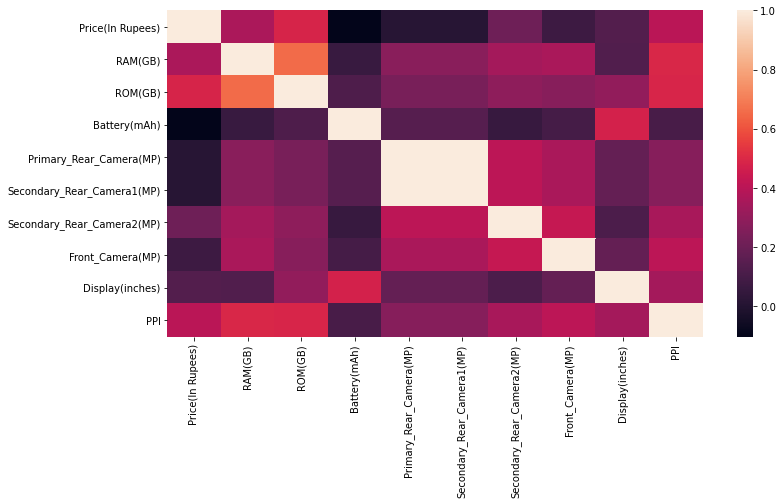

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [91]:
df.columns

Index(['Brand', 'Price(In Rupees)', 'Processor', 'RAM(GB)', 'ROM(GB)',
       'Battery(mAh)', 'Primary_Rear_Camera(MP)', 'Secondary_Rear_Camera1(MP)',
       'Secondary_Rear_Camera2(MP)', 'Front_Camera(MP)', 'Display(inches)',
       'PPI', 'OS'],
      dtype='object')

<AxesSubplot:xlabel='Brand'>

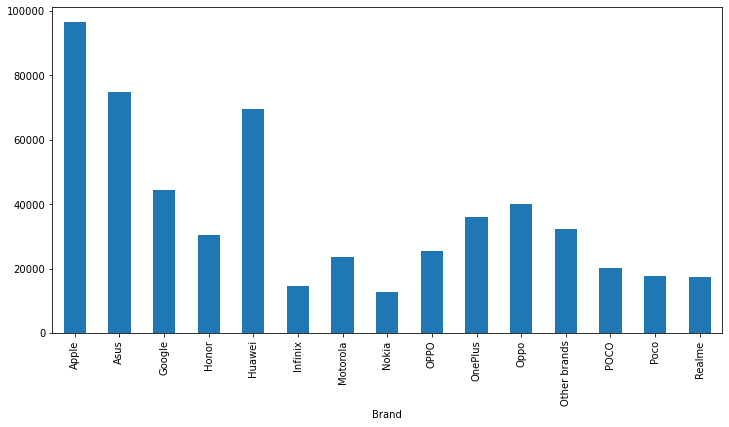

In [92]:
plt.figure(figsize=(12,6))
df.groupby('Brand')['Price(In Rupees)'].mean().head(15).plot(kind='bar')

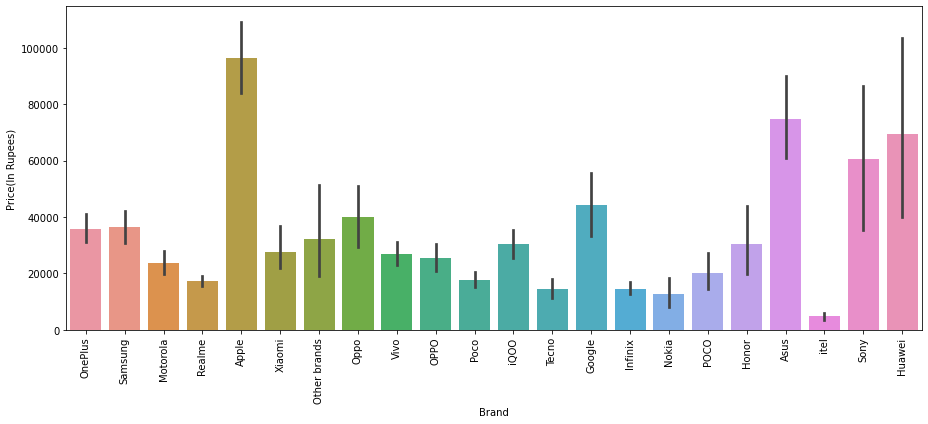

In [93]:
plt.figure(figsize=(13,6))
sns.barplot(x=df['Brand'],y=df['Price(In Rupees)'])
plt.xticks(rotation='vertical')
plt.tight_layout()

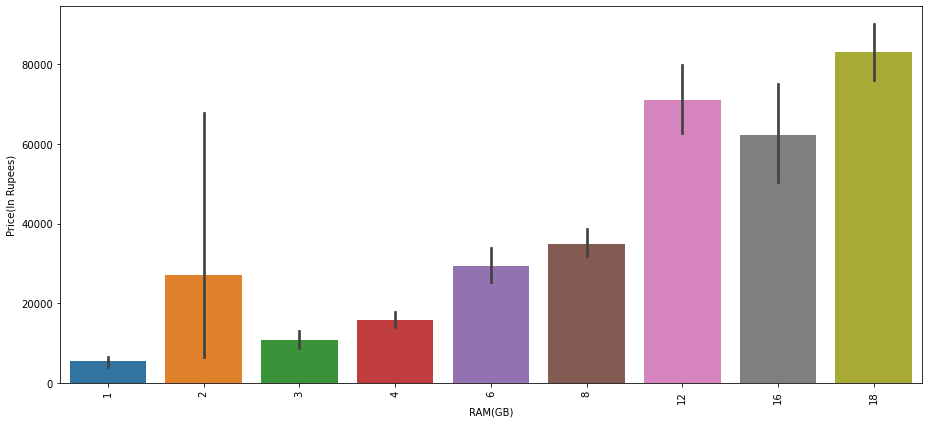

In [94]:
plt.figure(figsize=(13,6))
sns.barplot(x=df['RAM(GB)'],y=df['Price(In Rupees)'])
plt.xticks(rotation='vertical')
plt.tight_layout()

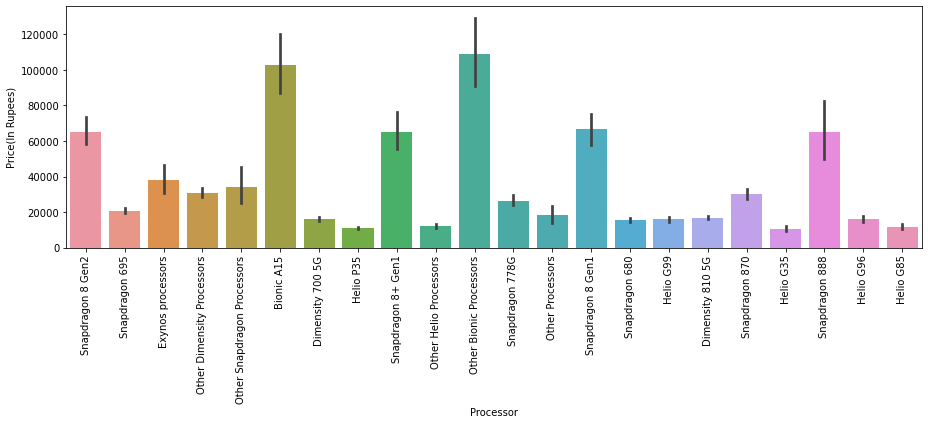

In [95]:
plt.figure(figsize=(13,6))
sns.barplot(x=df['Processor'],y=df['Price(In Rupees)'])
plt.xticks(rotation='vertical')
plt.tight_layout()

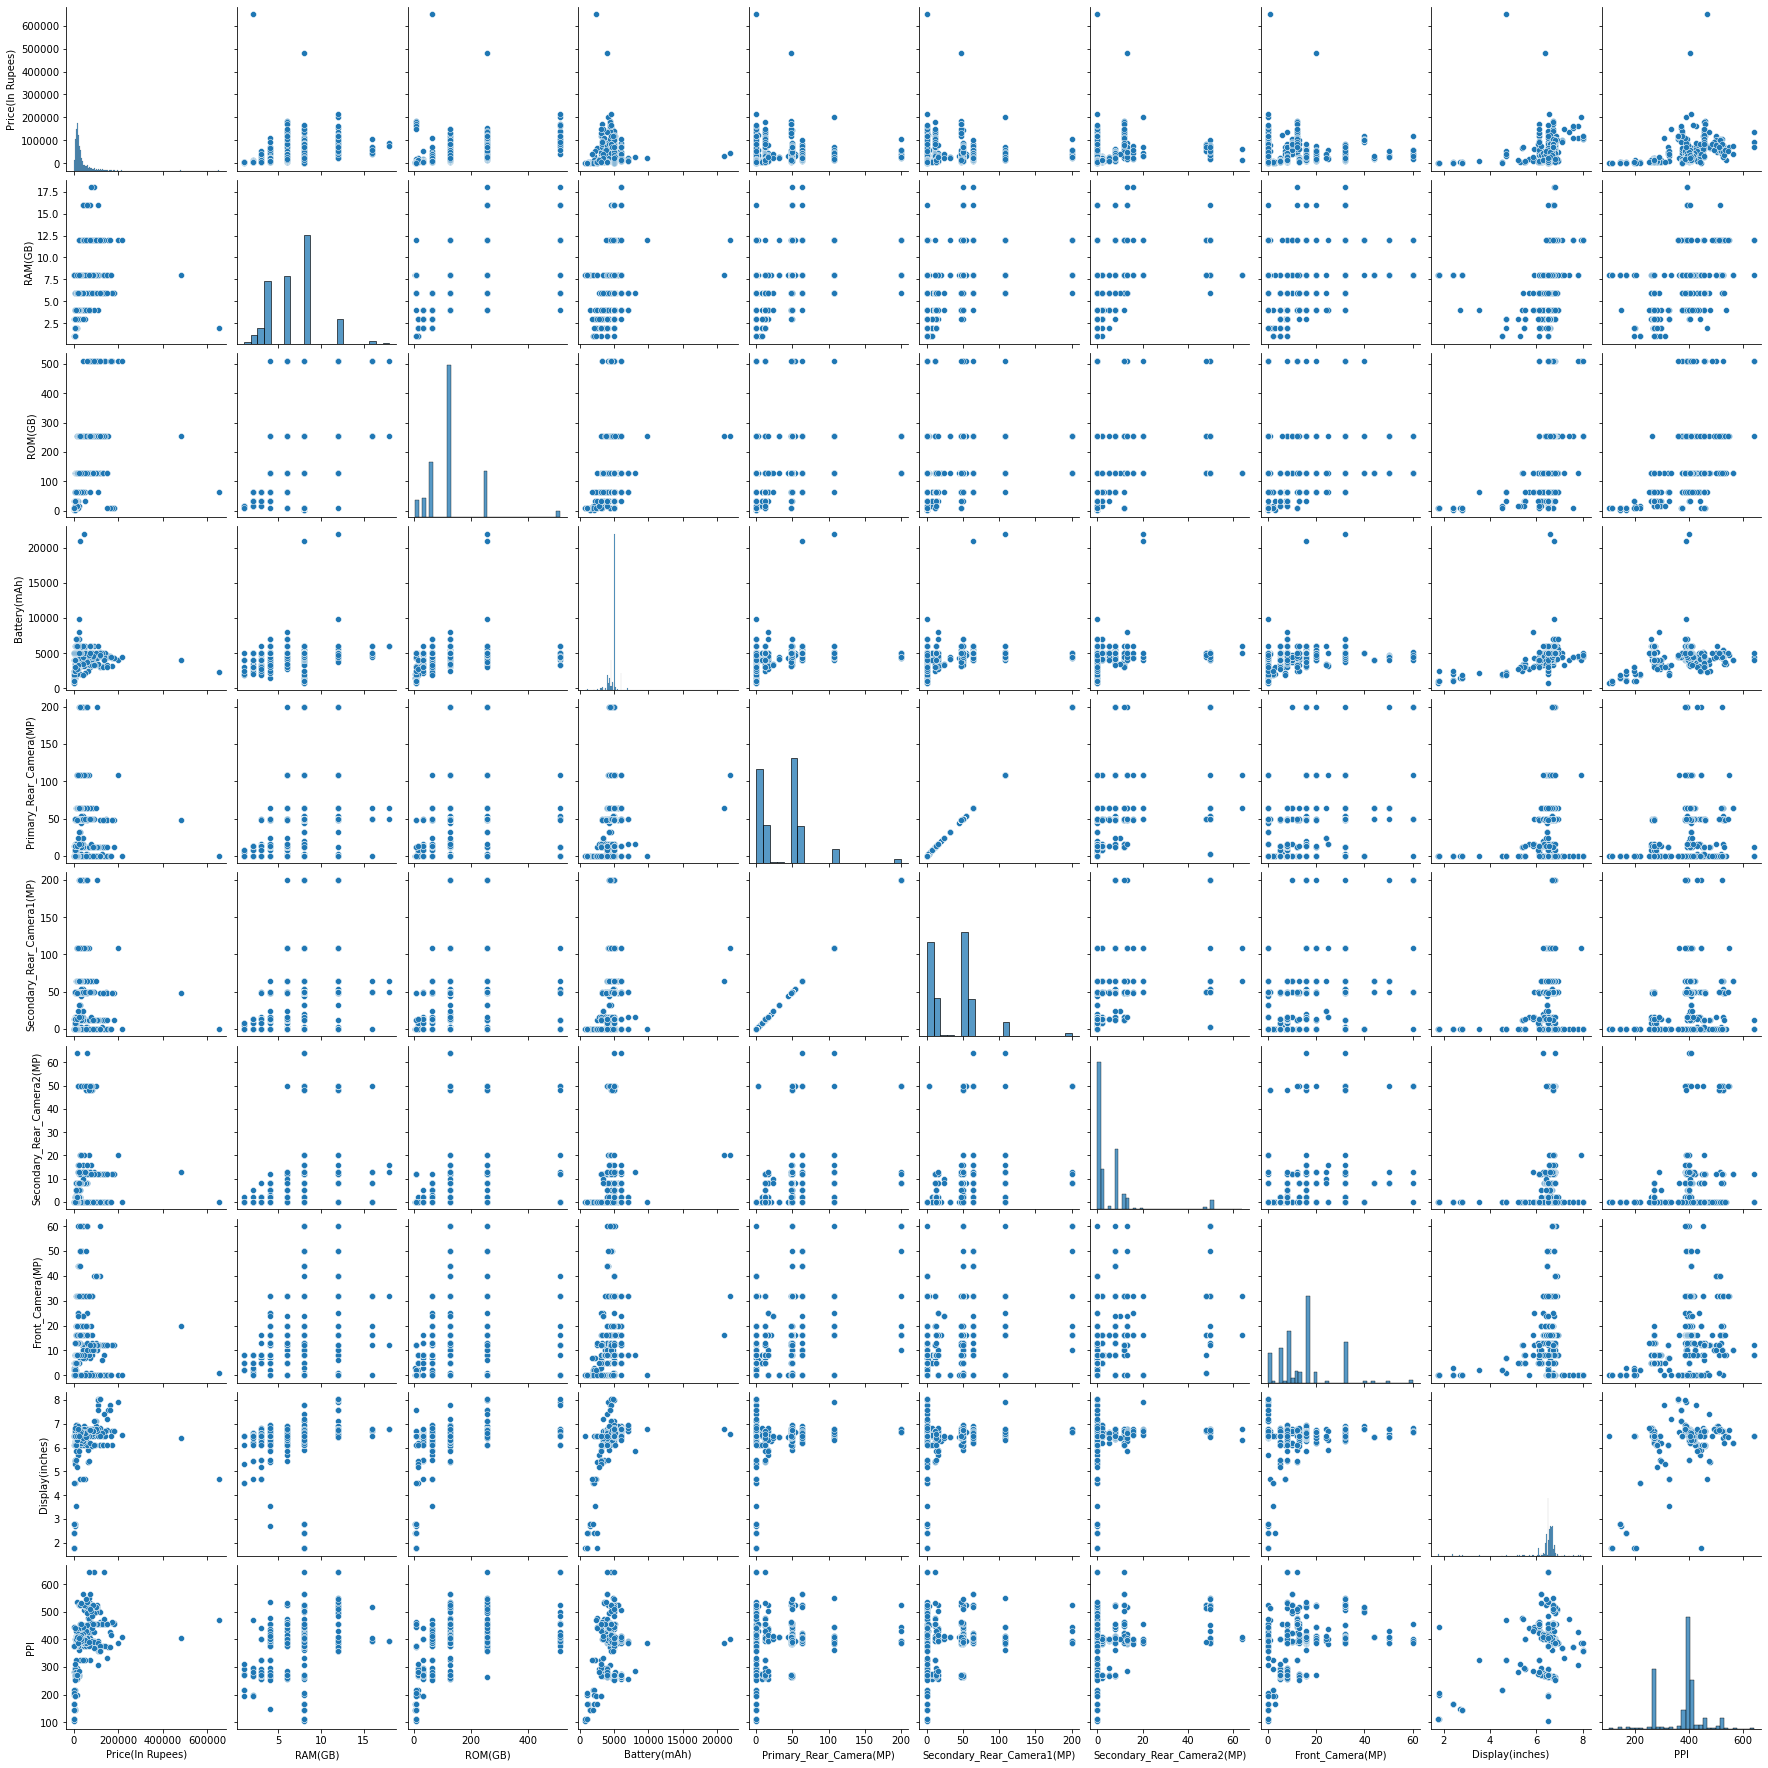

In [96]:
sns.pairplot(df)

C:\FAIZUL\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


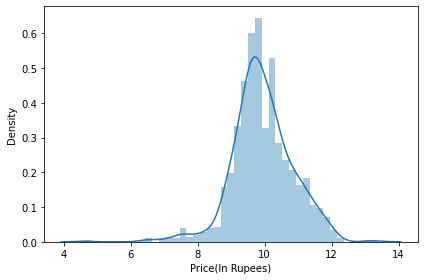

In [97]:
sns.distplot(np.log(df['Price(In Rupees)']))
plt.tight_layout()

# Machine Learning

In [98]:
X = df.drop('Price(In Rupees)',axis=1)
Y = np.log(df['Price(In Rupees)'])

In [99]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with a fixed random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [101]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [102]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [103]:
df.isnull().sum()

Brand                         0
Price(In Rupees)              0
Processor                     0
RAM(GB)                       0
ROM(GB)                       0
Battery(mAh)                  0
Primary_Rear_Camera(MP)       0
Secondary_Rear_Camera1(MP)    0
Secondary_Rear_Camera2(MP)    0
Front_Camera(MP)              0
Display(inches)               0
PPI                           0
OS                            0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       1016 non-null   object 
 1   Price(In Rupees)            1016 non-null   int32  
 2   Processor                   1016 non-null   object 
 3   RAM(GB)                     1016 non-null   Int64  
 4   ROM(GB)                     1016 non-null   Int64  
 5   Battery(mAh)                1016 non-null   Int64  
 6   Primary_Rear_Camera(MP)     1016 non-null   int32  
 7   Secondary_Rear_Camera1(MP)  1016 non-null   int32  
 8   Secondary_Rear_Camera2(MP)  1016 non-null   int32  
 9   Front_Camera(MP)            1016 non-null   int32  
 10  Display(inches)             1016 non-null   float64
 11  PPI                         1016 non-null   float64
 12  OS                          1016 non-null   object 
dtypes: Int64(3), float64(2), int32(5)

# Linear Regression

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.79106206489387
MAE 0.2738441569524253


C:\FAIZUL\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Ridge Regression

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.752544604084169
MAE 0.28779535297110453


C:\FAIZUL\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Lasso Regression

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

C:\FAIZUL\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7722138626351323
MAE 0.2709052860278556


# Decision Tree

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,11])
],remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.774683494746165
MAE 0.2439419207288359


C:\FAIZUL\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Random forest

In [223]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7948074987091422
MAE 0.2366417008592295


C:\FAIZUL\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Exporting the model

In [224]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [225]:
df.corr()['Price(In Rupees)']

Price(In Rupees)              1.000000
RAM(GB)                       0.363894
ROM(GB)                       0.485401
Battery(mAh)                 -0.102874
Primary_Rear_Camera(MP)       0.009555
Secondary_Rear_Camera1(MP)    0.009555
Secondary_Rear_Camera2(MP)    0.208607
Front_Camera(MP)              0.074155
Display(inches)               0.134134
PPI                           0.405220
Name: Price(In Rupees), dtype: float64